<a id="top"></a>

<h2 id="loading_liberary">LOADING LIBERARY</h2>

In [1]:
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline

from geopy import distance, Nominatim
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
import folium

from scipy import stats
from scipy.stats import norm
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse, meanabs
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import FunctionTransformer, quantile_transform, scale, StandardScaler, MinMaxScaler, StandardScaler, Normalizer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

%run "./project_class.ipynb"
func=Master

<h2 id="loading_dataset">LOADING DATASET</h2>

In [2]:
# df.to_csv('./data/kc_house_data.gz', compression='gzip')
df = pd.read_csv("./data/kc_house_data.gz", index_col=None)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
print("the data set contains {0:,} rows and {1} columns".format(df.shape[0], df.shape[1]))

the data set contains 21,597 rows and 22 columns


Column Names and descriptions for Kings County Data Set

     id             unique identified for a house
     date           Date house was sold
     price          Price  is prediction target
     bedrooms       Number of Bedrooms/House
     bathrooms      Number  of bathrooms/bedrooms
     sqft_living    square footage of the home
     sqft_lot       square footage of the lot
     floors         Total floors (levels) in house
     waterfront     House which has a view to a waterfront
     view           Has been viewed
     condition      How good the condition is ( Overall )
     grade          overall grade given to the housing unit, based on King County grading system
     sqft_above     square footage of house apart from basement
     sqft_basement  square footage of the basement
     yr_built       Built Year
     yr_renovated   Year when house was renovated
     zipcode        zip
     lat            Latitude coordinate
     long           Longitude coordinate
     sqft_living15  The square footage of interior housing living space for the nearest 15 neighbors
     sqft_lot15     The square footage of the land lots of the nearest 15 neighbors

<h2 id="descriptive">DESCRIPTIVE STATISTICS</h2>

In [4]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

<a href="#top">TOP!</a>

<h2 id="data_scrubbing">DATA SCRUBBING</h2>
Check Missing Values

In [6]:
for i in df.columns:
    total_nan = df[i].isnull().sum()
    if total_nan > 0:
        print("total missing value of {0:>15}is: {1:>5}".format(i, total_nan))
del total_nan

total missing value of      waterfrontis:  2376
total missing value of            viewis:    63
total missing value of    yr_renovatedis:  3842


both columns "view" and "waterfront" are categories where the "view" represented with the value 1 if the house has been seen and the "waterfront" represented with 1 if the house has waterfront, those will be filled with zeros

In [7]:
df['waterfront'].fillna(value=0, axis=0, inplace=True)
df['view'].fillna(value=0, axis=0, inplace=True)

the column "yr_renovated" represents the year in which the house was renovated, we noticed that only 744 houses were renovated. since the proportion of the renovated houses is so few compared to the entire column, it would make more sense if we use it as a category where we assign 1 to the renovated houses and 0 to those that are not

In [8]:
df['yr_renovated'].fillna(value=0, axis=0, inplace=True)
df.loc[df['yr_renovated']!=0, ['yr_renovated']] = 1
df.loc[:,'yr_renovated'] = df['yr_renovated'].apply(np.int)  #.astype('int')
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

Drop the column "Unnamed: 0" from axis 1 matching the string by RegEx

In [9]:
un_named_columns = df.iloc[:,df.columns.str.contains('^Unnamed', case=False, regex=True)]
df.drop(un_named_columns, axis=1, inplace=True)
del un_named_columns

Drop "ID column

In [10]:
df.drop(columns=['id'], inplace=True)
df['date'] = pd.to_datetime(df['date'], utc=False)

<a href="#top">TOP!</a>

<h2 id="data_exploration">DATA EXPLORATION</h2>
We start exploring our variable selecting the candidate variables that have significant correlation to our model

In [11]:
#define a list for the variables to exclude
var_excluded = set()

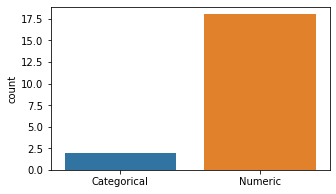

In [12]:
# generate a list to categorize our variables type
variables_type = [ "Numeric" if df[col].dtype in ['int64', 'float64'] else "Categorical" for col in df.columns]
plt.figure(figsize=(5,3))
sns.countplot(x=variables_type)
plt.show()

<h2 id="bedrooms">BEDROOMS</h2>

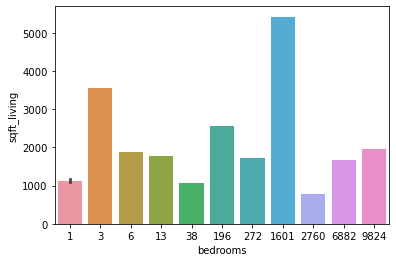

In [13]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(6,4)
sns.axes_style()
sns.barplot(x=df.bedrooms.value_counts(), y=df.sqft_living)

<h2 id="sqft_basement">SQFT_ABOVE & SQFT_BASEMENT</h2>

regarding the 2 variables "sqft_above" "sqft_basement" we noticed that the sum of both represents the actual square feet of the entire living area

in fact if we take for example line number 3 where "sqft_living" is 1960 the sqft_above "is 1050 it is easy to come out with the difference of "sqft_basement" which is 910.

in the real world we calculate the house price if the basement is finished since we do not have sufficient data to determine this data, we exclude this variable from our analyzes

In [14]:
var_excluded.update(('sqft_above', 'sqft_basement'))

<h2 id="sqft_lot">SQFT_LOT & SQFT_LIVING</h2>
Let us examine the importance of having a large lot. We will define a ratio of sqft_living over sqft_lot to understand if there is an ideal trade-off between lot size (presumably garden) and living space.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

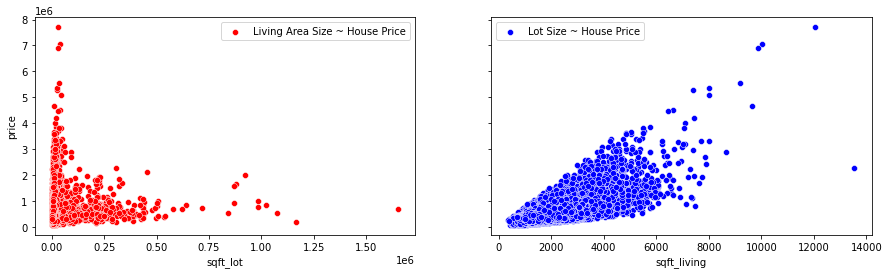

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_figwidth(15,10)
sns.axes_style()
sns.scatterplot(x=df.sqft_lot, y=df.price, color='red',  ax=ax1, label='Living Area Size ~ House Price')
sns.scatterplot(x=df.sqft_living, y=df.price, color='blue', ax=ax2, label='Lot Size ~ House Price')

In [16]:
_ = np.size(np.where((np.array(df.sqft_living/df.sqft_lot)) >= 1))
print('total houses with sqft_living >= sqft_lot:', _)

total houses with sqft_living >= sqft_lot: 788


unexpectedly we got 788 houses where the square footage of living aerea "sqft_living" is greater than lot square footage "sqft_lot", it's more likely about detached structures like garage, patios or even basement.

<h2 id="floors">FLOORS</h2>

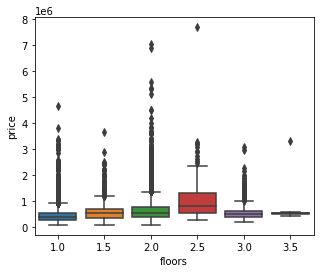

In [17]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_figwidth(5,5)
sns.boxplot(x=df['floors'], y=df['price'], ax=ax1)

<h2 id="waterfront">WATERFRONT</h2>
the waterfront column describes whether the house has waterfront with the value 1, otherwise the value 0, as observed only 146 houses has a waterfront, that is less than 1% of the entire dataset.

In [18]:
df['waterfront'].value_counts().to_frame()

,waterfront
0.0,21451
1.0,146


In [19]:
waterfront_1 = df.loc[df.waterfront==1,'price'].mean()
waterfront_0 = df.loc[df.waterfront==0,'price'].mean()
print(f"{'the waterfront house prices are higher by'} {(waterfront_1/waterfront_0)*100:.2f}%")

the waterfront house prices are higher by 322.61%


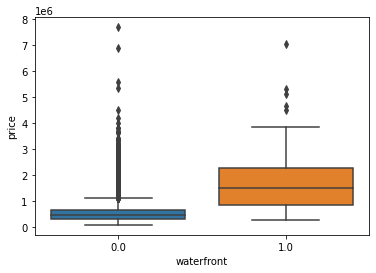

In [20]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(6,4)
sns.axes_style()
waterfront_bp = sns.boxplot(x=df['waterfront'], y=df['price'], ax=ax1)

count the unique values of the 'floors' & 'waterfront' to determine the houses type.

In [21]:
df['floors'].value_counts().to_frame()

,floors
1.0,10673
2.0,8235
1.5,1910
3.0,611
2.5,161
3.5,7


<h2 id="view">VIEW</h2>
the variable "view" describes the times that the house has been seen, however we have noticed that 19485 of the data are quale to zero.

<AxesSubplot:xlabel='view', ylabel='count'>

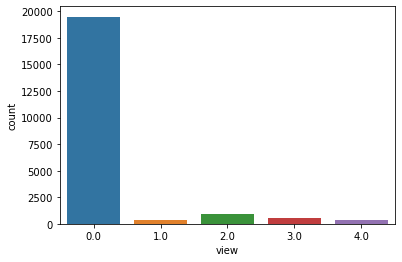

In [22]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(6,4)
sns.axes_style()
sns.countplot(x=df['view'], ax=ax1)

In [23]:
print("view: zeros value: {0:>10}".format((df.view==0).sum()))
print("renovated: zeros value: {0:>5}".format( (df.renovated==0).sum() ))

view: zeros value:      19485
renovated: zeros value: 20853


we're goin to exclude the 'view' column since it contains almost all null values.

<h2 id="condition">CONDITION</h2>

<p>
Relative to age and grade. Coded 1-5.<br>
    1 = Poor- Worn out.<br>
    2 = Fair- Badly worn.<br>
    3 = Average <br>
    4 = Good<br>
    5= Very Good}</p>

<AxesSubplot:xlabel='condition', ylabel='price'>

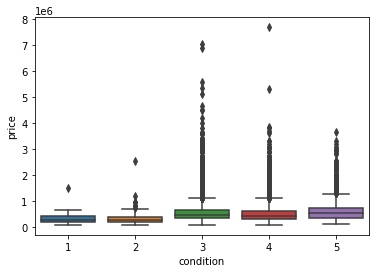

In [24]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(6,4)
sns.axes_style()
sns.boxplot(x=df['condition'], y=df['price'], ax=ax1)

<h2 id="grade">GRADE</h2>

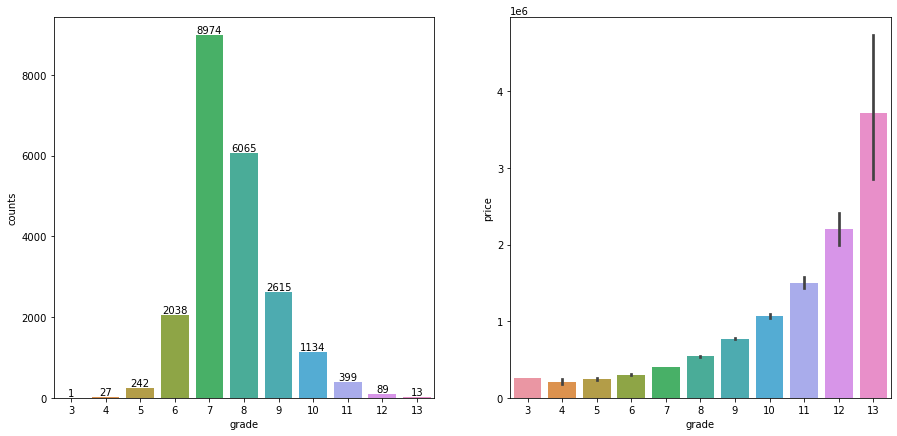

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
fig.set_size_inches(15,7)
sns.axes_style()
df_by_grade = df.groupby('grade').size().reset_index(name='counts')
g = sns.barplot(x='grade', y='counts', data=df_by_grade, linewidth=3, errcolor='gray', ax=ax1)
for index, row in df_by_grade.iterrows():
    g.text(row.name, row.counts, round(row.counts, 2), color='black', va='bottom',  ha="center", fontsize=10)
g2=sns.barplot(x='grade', y='price', data=df, ax=ax2)

Represents the construction quality of improvements. Grades run from grade 1 to 13.:
<a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b">King County link</a>

### let's compare the lot size with the living area and the percentage of living aerea compared to the lot size

<h2 id="yr_built">YR_BUILT</h2>

<p>
Let's count the houses based on the year of construction, it seems to have a strong correlation/p>

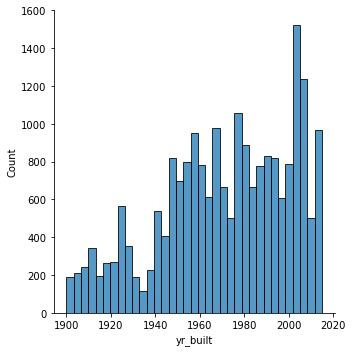

In [26]:
sns.displot(x=df['yr_built'])

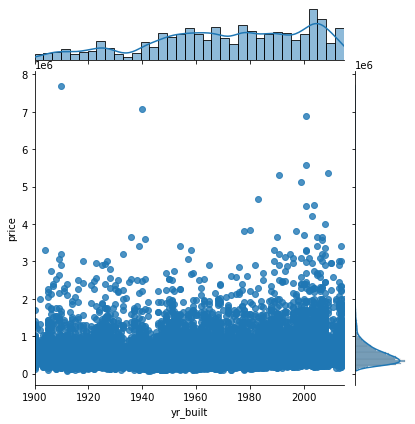

In [27]:
sns.jointplot(x="yr_built", y="price", data=df, kind="reg")

<h2 id="price_distribution">PRICE DISTRIBUTION</h2>
<p>simple Seaborn scatterplot shows homes by their latitude and longitude, with price set as the hue.</p>

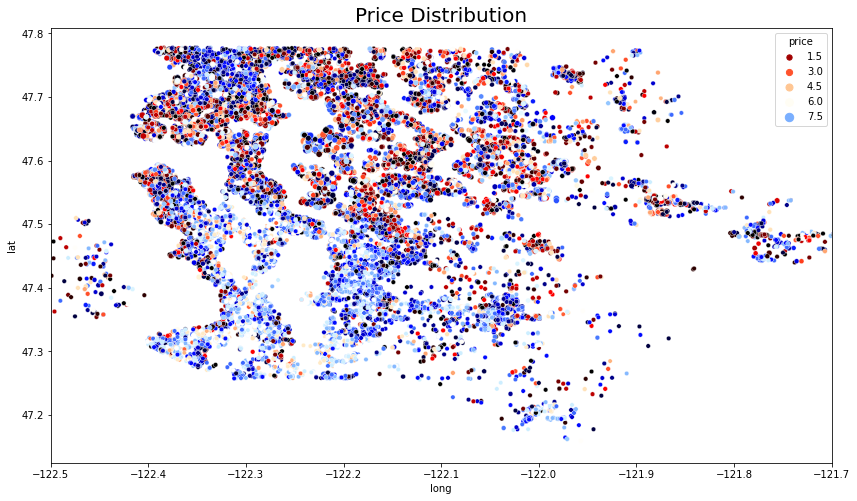

In [28]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df.long, y=df.lat, hue=df.price, size=df.price, palette='flag')
plt.xlim(-122.5, -121.7)
plt.title('Price Distribution', fontdict={'fontsize': 20})
plt.show()

<a href="#top">TOP!</a>

<p>let's visualize the top 70 zip codes with with an interactive geographic map</p>

In [38]:
dfzip = df.drop_duplicates('zipcode', keep='first')
centerlat = (dfzip['lat'].max() + dfzip['lat'].min()) / 2
centerlong = (dfzip['long'].max() + dfzip['long'].min()) / 2
map = folium.Map(location=[centerlat, centerlong], zoom_start=9)
#icon = folium.Icon(color='blue', icon_color='white', icon='info-sign',angle=0)

for i in range(dfzip.shape[0]):
    pup = '${:,}'.format(dfzip.iloc[i]['price'])
    if dfzip.iloc[0]['waterfront'] == 1:
        ic = folium.Icon(color='red', icon_color='red')
    else:
        ic = folium.Icon(color='blue', icon_color='white')
    folium.Marker([dfzip.iloc[i]['lat'], dfzip.iloc[i]['long']], icon=ic, popup=pup, radius=3).add_to(map)
# map.save('top_70_zipcode.html')
map

<h2 id="top">FEATURE ENGINEERING</h2>
<p>exclude variables that are not relevant to the analysis, we're going to use the scatterplot matrix to evaluate the correlation and the Multicollinearity.</p>

In [28]:
var_excluded.update(('lat','long', 'zipcode', 'bathrooms','date'))

In [29]:
var_predictors = set(df.columns)-var_excluded

<h2 id="long_lat">LONG & LAT</h2>
<p>From previous plot we notice that the price seems to go down as houses are further from the center,
It would be appropriate to create a new feature that represents distance from the center of King County.
for feature we used the geopy library, which essentially calculates the distance in miles from specific latitude and longitude points..</p>

In [33]:
lat_long=[(x,y) for x,y in zip(df['lat'], df['long'])]
kc = (47.6062, -122.3321) # king county usa downtown lat long
miles = [int(round(distance.distance(i, kc).miles,0)) for i in lat_long ]
df['distance'] = miles
var_predictors.add(('distance'))

<AxesSubplot:xlabel='distance', ylabel='price'>

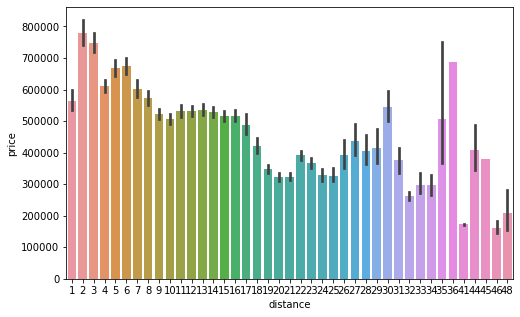

In [34]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(8,5)
sns.axes_style()
sns.barplot(x='distance', y='price', data=df)

<h2 id="cat_var">Categorical Variables</h2>
<p>once we have identified the category variables, let's take a final visual look at the variables for further confirmation.</p>

In [35]:
var_categories =  {'condition', 'waterfront', 'floors', 'renovated', 'bedrooms' , 'view', 'grade'}

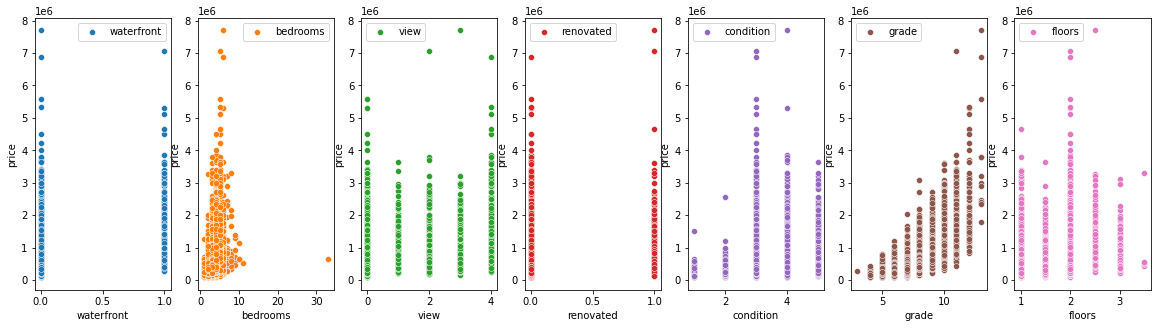

In [36]:
palette = itertools.cycle(sns.color_palette())
fig, axes = plt.subplots(nrows=1, ncols=len(var_categories), figsize=(20,5))
for xcol, ax in zip(var_categories, axes):
    sns.scatterplot(x=df[xcol], y=df['price'] , ax=ax, label=xcol, color=next(palette))

<p>as we see from the graph it seems that variables are cattegoric type so we're going to use the pandas CUT method to segment these values into groups of "bins".</p>

In [37]:
yr_built_bins = [1900,1923,1946,1969,1992,2015]
yr_built_labels = ['1900_1923','1924_1946','1947_1969','1970_1992','1993_2015']
yr_built_cat = pd.cut(x=df['yr_built'], bins=yr_built_bins, labels=yr_built_labels, include_lowest=True)
df['yr_built'] = yr_built_cat.cat.as_unordered()

In [38]:
var_categories.add(('yr_built'))

<AxesSubplot:>

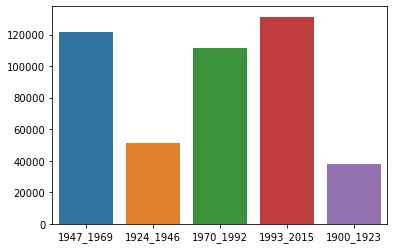

In [39]:
yr_built_unique = df.yr_built.unique()
n_construction  = [df[df.yr_built == j].size for j in df.yr_built.unique()]
sns.barplot(x=yr_built_unique, y=n_construction)

<p style="color:Black;">Convert categorical features into Int.' dtype</p>

In [40]:
df.condition  = df.condition.astype(int)
df.waterfront = df.waterfront.astype(int)
df.floors     = df.floors.astype(int)
df.renovated  = df.renovated.astype(int)
df.grade      = df.grade.astype(int)
df.view       = df.view.astype(int) 

<h2 id="one_hat">ONE-HOT-ENCODING</h2>
<p style="color:DodgerBlue;"></p>

In [41]:
#create a dummy data by removing redundant columns when using get_dummies
df_categories = pd.DataFrame()

for cat in var_categories:
    df_categories[cat]=df[cat].astype('category')
    df_dummy = pd.get_dummies(df_categories[cat], prefix=cat, drop_first=True) 
    df_categories = df_categories.join(df_dummy)
    df_categories.drop(labels=cat, axis=1, inplace=True)

<p>
using the USZIPCODE library we're going to decode the zip code in order to obtain a list of the corresponding neighborhoods. it's more efficient decoding by zipcode rather than coordinates since the unique values are only 70.
we noticed that the 70 zip codes present in the dataframe refers to 24 neighborhoods in other words, the 21597 houses are all concentrated in 24 urban areas.</p>

In [42]:
search = SearchEngine()
neighbourhoods = [search.by_zipcode(c).city for c in df.zipcode]
df['neighbourhoods'] = neighbourhoods

df_neighbourhoods = pd.DataFrame()
df_neighbourhoods = df['neighbourhoods'].astype('category')
df_neighbourhoods = pd.get_dummies(df_neighbourhoods, drop_first=True)

In [43]:
var_categories.add(('neighbourhoods'))
df_categories = df_categories.join(df_neighbourhoods)

<h2 id="corr_matrix">CORRELATION MATRIX</h2>
<p></p>

Text(0.5, 1.0, 'Correlation between features')

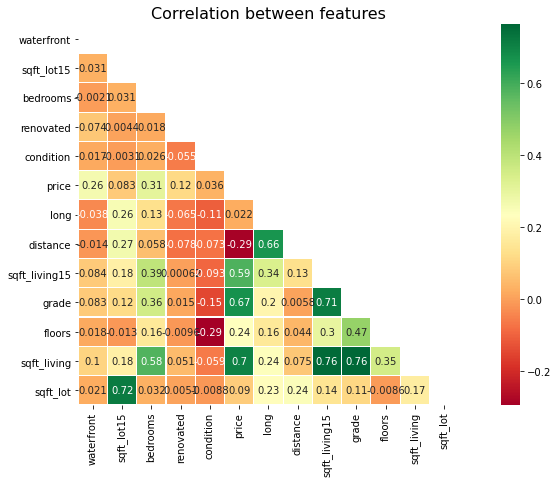

In [44]:
cor_features = set(df.columns)-set(('zipcode', 'view', 'sqft_basement','sqft_above','lon','lat','bathrooms'))
corr = df[cor_features].corr(method='pearson')
# mask = corr[(corr !=1.000)]
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 7))
sns.heatmap(corr, mask=mask, annot=True, linewidth=.1, cmap="RdYlGn", square=True)
plt.title('Correlation between features', fontdict={'fontsize': 16})

<!--
predictors_corr = func.correlation(corr,.7,1)
df[var_predictors].corr()['price'].sort_values(ascending=False)
-->

<a href="#top">TOP</a>

<h2 id="pairplot">CHECK FEATURES DISTRIBUTION</h2>
<p>
We would like to investigate the relationship between our target variable price and the continuous feature variables in our dataset. We will make use of Seaborn's jointplot to simultaneously inspect linearity and distributions.
</p>

In [45]:
df_features = pd.DataFrame(df[var_predictors-var_categories])

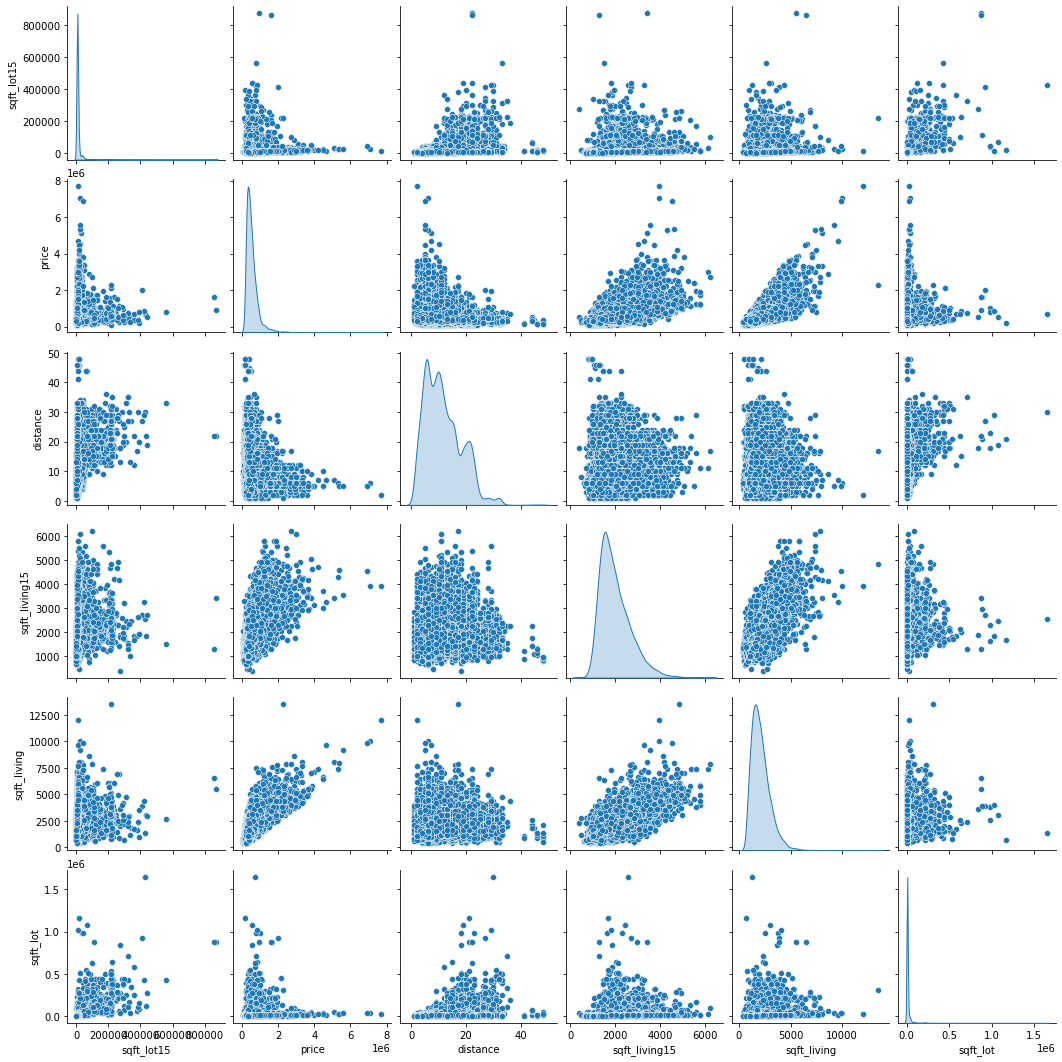

In [46]:
sns.pairplot(df_features, diag_kind="kde")

<h2 id="standard_scaler">Min Max SCALER</h2>
<p>Using the standard  function from sklearn to scale the indepedent variables, so that all the features hold a standard weight towards the depedent variable.</p>

In [47]:
x_scaler    = MinMaxScaler()
y_scaler    = MinMaxScaler()

y           = y_scaler.fit_transform(df.price.values.reshape(-1,1)) 
x_scaled    = x_scaler.fit_transform(df_features.drop(labels=['price'], axis=1))
df_features = pd.DataFrame(x_scaled, columns=df_features.columns.difference(['price']))
df_features.head()

,distance,sqft_living,sqft_living15,sqft_lot,sqft_lot15
0,0.005742,0.127660,0.161934,0.061503,0.003108
1,0.008027,0.148936,0.222165,0.167046,0.004072
2,0.008513,0.191489,0.399415,0.030372,0.005743
3,0.004996,0.127660,0.165376,0.120729,0.002714
4,0.007871,0.255319,0.241094,0.099468,0.004579


<a href="#top">TOP</a>

<h2 id="standard_scaler">MODELING</h2>
<p>
as a starting point, we are trying to establish the following models, each responding to different criteria.</p>


<h4 id="standard_scaler">Model A</h4>
<p>
our  first model aims to establish the correlation between continuous features to obtain as a first result a moderate value of coefficient of determination R2.</p>

In [48]:
x            = df_features
x            = sm.add_constant(x)

model_a      = sm.OLS(y, x).fit()
model_a_pred = model_a.predict(x)
print(str(model_a.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     7221.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:05:52   Log-Likelihood:                 45461.
No. Observations:               21597   AIC:                        -9.091e+04
Df Residuals:                   21591   BIC:                        -9.086e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0147      0.001     25.662

<h5 id="pairplot">Model A Scores</h5>

In [49]:
model_a_mae, model_a_mse, model_a_rmse = func.metrics(y, model_a_pred)

R-squared                0.626
Mean Absolute Error      0.019 $141,677.74
Mean Squared Error       0.001
Root Mean Squared Error  0.029 $224,726.54


Using Variance Inflation Factor (VIF) we measure of collinearity among predictor variables within Model A.

In [50]:
func.vif(x)

const            8.185292
distance         2.129808
sqft_living      1.097942
sqft_living15    2.379905
sqft_lot         2.370869
sqft_lot15       2.088376
dtype: float64

<h2 id="pairplot">MODEL B</h2>
<p>the second model would be more accurate and complex given the numerous categorical variables. our goal is to obtain a better performing model with a high R2 value while maintaining a significant P-value below a threshold of 0.05</p>

In [51]:
x = pd.concat([x, df_categories], axis= 1)

In [52]:
x             = sm.add_constant(x)
model_b       = sm.OLS(y,x).fit()
model_b_pred  = model_b.predict(x)

print(str(model_b.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1211.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:06:03   Log-Likelihood:                 51459.
No. Observations:               21597   AIC:                        -1.028e+05
Df Residuals:                   21531   BIC:                        -1.023e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0604      0

<h5 id="pairplot">Model b Scores #1</h5>

In [53]:
model_b_mae, model_b_mse, model_b_rmse = func.metrics(y, model_b_pred)

R-squared                0.785
Mean Absolute Error      0.014 $106,303.35
Mean Squared Error       0.000
Root Mean Squared Error  0.022 $170,235.73


<p>
For an initial fit the model looks good obtaining a R-Squared of 0.785 and as well as Adj. R-squared of 0.785.
The contribution is attributed to the categorical variabers that make the model more stable and positive.</p>
<p>
Surprisingly the P-Value of the continuous variables is lower than the threshold of 0.05. Furthermore, some categories that exceed the cut-off threshold, so we begin to discard these variables while maintaining those with a value of less than .05.</p>

In [54]:
stepwise_result = func.stepwise_selection(x, y, verbose=False)
print('resulting features:')
print(stepwise_result)

resulting features:
['view_4', 'grade_10', 'grade_11', 'sqft_living', 'sqft_living15', 'const', 'sqft_lot', 'Medina', 'grade_12', 'grade_13', 'waterfront_1', 'Renton', 'grade_9', 'Bellevue', 'Mercer Island', 'Enumclaw', 'North Bend', 'Seattle', 'condition_5', 'renovated_1', 'Kent', 'view_3', 'grade_8', 'condition_4', 'Snoqualmie', 'Kenmore', 'Carnation', 'yr_built_1924_1946', 'grade_6', 'yr_built_1970_1992', 'Black Diamond', 'Fall City', 'view_2', 'yr_built_1947_1969', 'yr_built_1993_2015', 'bedrooms_3', 'view_1', 'Vashon', 'bedrooms_2', 'Bothell', 'Federal Way', 'sqft_lot15', 'Maple Valley', 'Duvall', 'Issaquah', 'Redmond', 'grade_5', 'bedrooms_8']


In [55]:
x            = x[stepwise_result]
x            = sm.add_constant(x)

model_c      = sm.OLS(y,x).fit()
model_c_pred = model_c.predict(x)
print(str(model_c.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1672.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:06:37   Log-Likelihood:                 51436.
No. Observations:               21597   AIC:                        -1.028e+05
Df Residuals:                   21549   BIC:                        -1.024e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
view_4                 0.0339      0

In [56]:
model_b_mae, model_b_mse, model_b_rmse = func.metrics(y, model_b_pred)

R-squared                0.785
Mean Absolute Error      0.014 $106,303.35
Mean Squared Error       0.000
Root Mean Squared Error  0.022 $170,235.73


<h2 id="pairplot">SKLEARN MODEL</h2>
<p>
Regression Model Validation
</p>

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=7)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

#Calculating predictions on the train set, and test set
y_hat_train = linreg.predict(x_train)
y_hat_test  = linreg.predict(x_test)

#Calculating your residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#Calculating the Mean Squared Error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse  = mean_squared_error(y_test, y_hat_test)

print("\033[94m"f"{'R^2 Score':<30}{round(linreg.score(x, y),2):>5}")
print(f"{'Train Mean Squarred Error':<30} {train_mse:>5}")
print(f"{'Test Mean Squarred Error':<30} {test_mse:>5}")

R^2 Score                      0.78
Train Mean Squarred Error      0.0005325592772809952
Test Mean Squarred Error       0.0004267273157622785


In [58]:
model_b_mae, model_b_mse, model_b_rmse = func.metrics(y_test, y_hat_test)

R-squared                0.801
Mean Absolute Error      0.014 $104,132.96
Mean Squared Error       0.000
Root Mean Squared Error  0.021 $157,450.54


<h2 id="pairplot">CROSS VALIDATION SCORE</h2>
<p style="color:DodgerBlue;">

</p>

In [59]:
kf = KFold(n_splits=10, shuffle=True, random_state=74)

msw    = cross_val_score(linreg, x_test, y_test, scoring='neg_mean_squared_error', cv=kf, n_jobs=1)
scores  = cross_val_score(linreg, x, y, scoring='r2', cv=kf, n_jobs=1)


In [60]:
model_b_mae, model_b_mse, model_b_rmse = func.metrics(y_test, y_hat_test)

R-squared                0.801
Mean Absolute Error      0.014 $104,132.96
Mean Squared Error       0.000
Root Mean Squared Error  0.021 $157,450.54
